In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Glass\Glass_NG_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,NaN,4.49,1.10,71.78,0.06,NaN,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,NaN
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,NaN
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,NaN,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	5
float64		column 2	21
float64		column 3	5
float64		column 4	0
float64		column 5	5
float64		column 6	20
float64		column 7	11
float64		column 8	10
float64		column 9	15


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,209.000000,193.000000,209.000000,214.000000,209.000000,194.000000,203.000000,204.000000,199.000000
mean,1.518370,13.399223,2.731531,1.444907,72.657129,0.445825,8.942611,0.177402,0.057186
std,0.003047,0.805404,1.409154,0.499270,0.761099,0.348708,1.400416,0.506071,0.097598
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516530,12.930000,2.240000,1.190000,72.280000,0.122500,8.225000,0.000000,0.000000
50%,1.517680,13.250000,3.480000,1.360000,72.790000,0.550000,8.600000,0.000000,0.000000
75%,1.519160,13.800000,3.610000,1.630000,73.080000,0.610000,9.145000,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,2.700000,16.190000,3.150000,0.510000


<AxesSubplot:>

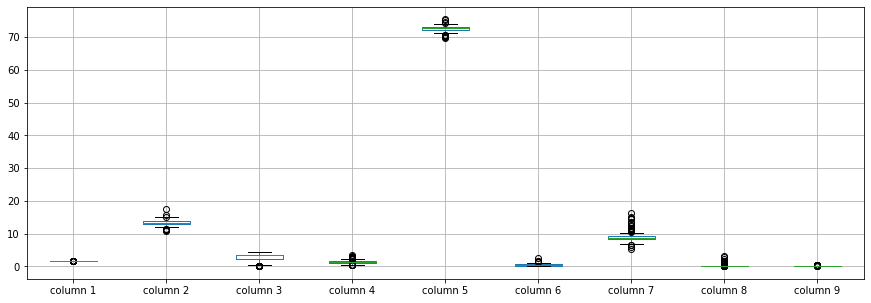

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.518370
column 2    13.399223
column 3     2.731531
column 4     1.444907
column 5    72.657129
column 6     0.445825
column 7     8.942611
column 8     0.177402
column 9     0.057186
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,-0.219809,-0.155803,-0.396683,-0.535294,-0.304326,0.812404,0.017712,0.138379
column 2,-0.219809,1.000000,-0.321340,0.196305,0.016894,-0.411641,-0.212279,0.323270,-0.243540
column 3,-0.155803,-0.321340,1.000000,-0.462994,-0.140763,0.289596,-0.422470,-0.522244,0.069184
column 4,-0.396683,0.196305,-0.462994,1.000000,0.000336,0.173691,-0.255188,0.491410,-0.080749
column 5,-0.535294,0.016894,-0.140763,0.000336,1.000000,0.067975,-0.238730,-0.128995,-0.093438
column 6,-0.304326,-0.411641,0.289596,0.173691,0.067975,1.000000,-0.386444,0.017480,0.060259
column 7,0.812404,-0.212279,-0.422470,-0.255188,-0.238730,-0.386444,1.000000,-0.194288,0.104880
column 8,0.017712,0.323270,-0.522244,0.491410,-0.128995,0.017480,-0.194288,1.000000,-0.061014
column 9,0.138379,-0.243540,0.069184,-0.080749,-0.093438,0.060259,0.104880,-0.061014,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+49,9+49+49,9+49+49+49,9+49+49+49+49,9+49+49+49+49+49,9+49+49+49+49,9+49+49+49,9+49+49,9+49,9], vae_layer = False, seed = 9)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 98.5638656616211
Epoch: 1 , loss: 98.57857924241286
Epoch: 2 , loss: 98.55768057016226
Epoch: 3 , loss: 98.61620330810547
Epoch: 4 , loss: 98.58502842829778
Epoch: 5 , loss: 98.5086898803711
Epoch: 6 , loss: 98.48417252760667
Epoch: 7 , loss: 98.50893460787259
Epoch: 8 , loss: 98.81152930626503
Epoch: 9 , loss: 98.44612767146184
Epoch: 10 , loss: 98.47614875206581
Epoch: 11 , loss: 98.457887502817
Epoch: 12 , loss: 98.42684819148137
Epoch: 13 , loss: 98.5426271878756
Epoch: 14 , loss: 98.74215287428636
Epoch: 15 , loss: 98.48950664813702
Epoch: 16 , loss: 98.42344724214993
Epoch: 17 , loss: 98.44735541710487
Epoch: 18 , loss: 98.63606438269981
Epoch: 19 , loss: 98.4150883601262
Epoch: 20 , loss: 98.42989642803485
Epoch: 21 , loss: 98.5004172691932
Epoch: 22 , loss: 98.56912877009465
Epoch: 23 , loss: 98.47381004920372
Epoch: 24 , loss: 98.8450417151818
Epoch: 25 , loss: 98.38122323843149
Epoch: 26 , los

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(214, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     1.519660
column 2     4.232463
column 3     3.750000
column 4     0.290000
column 5    72.020000
column 6     0.030000
column 7     3.226502
column 8     0.000000
column 9     0.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Glass.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.0,-8.931262,0.0,0.0,0.0,0.000000,-5.226474,0.0,0.000000
1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.033445
2,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.024082
3,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
4,0.0,0.000000,0.0,0.0,0.0,-0.148755,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
209,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
210,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
211,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
212,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(147.52268027728024, 1090.4359815890969)

In [17]:
NRMS=numerator/denominator
NRMS


0.1352877956781056

In [18]:
new_df.iloc[66,:]

column 1     1.52152
column 2    13.05000
column 3     3.65000
column 4     0.87000
column 5    72.22000
column 6     0.19000
column 7     9.85000
column 8     0.00000
column 9     0.17000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,4.708738,4.49,1.10,71.78,0.060000,3.523526,0.00,0.000000
1,1.51761,13.890000,3.60,1.36,72.73,0.480000,7.830000,0.00,0.033445
2,1.51618,13.530000,3.55,1.54,72.99,0.390000,7.780000,0.00,0.024082
3,1.51766,13.210000,3.69,1.29,72.61,0.570000,8.220000,0.00,0.000000
4,1.51742,13.270000,3.62,1.24,73.08,0.401245,8.070000,0.00,0.000000
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.140000,0.00,2.88,72.61,0.080000,9.180000,1.06,0.000000
210,1.51685,14.920000,0.00,1.99,73.06,0.000000,8.400000,1.59,0.000000
211,1.52065,14.360000,0.00,2.02,73.42,0.000000,8.440000,1.64,0.000000
212,1.51651,14.380000,0.00,1.94,73.61,0.000000,8.480000,1.57,0.000000


In [20]:
imputations[-1].to_excel("Glass_NG_5(imp).xlsx", index=False, header=False)